<center><h2>COMP40020: Human Language Technologies
Assignment 1 </h2></center>


#### imports

In [103]:
import nltk
import re
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import praw
from praw.models import MoreComments
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.collocations import BigramAssocMeasures, BigramCollocationFinder, TrigramAssocMeasures, TrigramCollocationFinder


### references:
- Code was adapted from the following resources as well as code from the labs:
-  https://www.learndatasci.com/tutorials/sentiment-analysis-reddit-headlines-pythons-nltk/
- https://medium.com/@kiddojazz/reddit-sentiment-analysis-f8a1a790124a
- https://towardsdatascience.com/automate-sentiment-analysis-process-for-reddit-post-textblob-and-vader-8a79c269522f

In [3]:
ci = "fQeiW15Vp7PWost_U0QkaA" #your client id
cs = "p2LFKOI2h6gyQ_Y3A9ilM-hprJGMiA" #your client secret
ua = "busterorwha" #your user agent name


In [4]:

reddit = praw.Reddit(client_id=ci,
                     client_secret=cs,
                     user_agent=ua)




### sets to hold headlines

In [5]:
headlines = set()
headlines_newZealand = set()

### Looking at 900 new post titles 

In [6]:
# r/ireland
for submission in reddit.subreddit('ireland').new(limit=900):
    headlines.add(submission.title)
    display.clear_output()
    print(len(headlines))

897


In [7]:
# r/newzealand
for submission in reddit.subreddit('newzealand').new(limit=900):
    headlines_newZealand.add(submission.title)
    display.clear_output()
    print(len(headlines_newZealand))

900


### r/ireland

In [8]:
# function for sentiment analysis 
def sia_function(headlines):

    sia = SIA()
    results = []

    for line in headlines:
        pol_score = sia.polarity_scores(line)
        pol_score['headline'] = line
        results.append(pol_score)
        
    return results

    

In [9]:
# sentiment intensity analyser 

sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': 0.0,
  'headline': 'Sinn Féin calls on Government to cut energy costs immediately by capping prices',
  'neg': 0.138,
  'neu': 0.724,
  'pos': 0.138},
 {'compound': 0.2263,
  'headline': 'What age would you allow a child to use a swimming pool dressing room on their own?',
  'neg': 0.0,
  'neu': 0.881,
  'pos': 0.119},
 {'compound': 0.0,
  'headline': 'Aftersun question : Are the nightclub scenes show in this supposed to have happened '
              'or are they metaphorical etc?',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


### r/newzealand

In [10]:
results_nz = sia_function(headlines_newZealand)
pprint(results_nz[:3], width=100)

[{'compound': -0.6696,
  'headline': 'Why are NZ Hotel Disabled Bathrooms so bad?',
  'neg': 0.391,
  'neu': 0.609,
  'pos': 0.0},
 {'compound': -0.4939, 'headline': 'Funny but sad', 'neg': 0.585, 'neu': 0.141, 'pos': 0.275},
 {'compound': 0.5106,
  'headline': 'Senior government analyst accused of reporting to Chinese government by Security '
              'Intelligence Service',
  'neg': 0.124,
  'neu': 0.565,
  'pos': 0.311}]


### dataframe r/ireland

In [11]:
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.138,0.724,0.138,0.0000,Sinn Féin calls on Government to cut energy co...
1,0.000,0.881,0.119,0.2263,What age would you allow a child to use a swim...
2,0.000,1.000,0.000,0.0000,Aftersun question : Are the nightclub scenes s...
3,0.000,1.000,0.000,0.0000,‘Serious concerns’ over the demolition and red...
4,0.000,1.000,0.000,0.0000,Any snow in your neck of the woods yet?


### defining positive and negative label

In [12]:
def define_positive(df):
    df['label'] = 0
    df.loc[df['compound'] > 0.2, 'label'] = 1
    df.loc[df['compound'] < -0.2, 'label'] = -1
    return df
    

In [13]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.138,0.724,0.138,0.0000,Sinn Féin calls on Government to cut energy co...,0
1,0.000,0.881,0.119,0.2263,What age would you allow a child to use a swim...,1
2,0.000,1.000,0.000,0.0000,Aftersun question : Are the nightclub scenes s...,0
3,0.000,1.000,0.000,0.0000,‘Serious concerns’ over the demolition and red...,0
4,0.000,1.000,0.000,0.0000,Any snow in your neck of the woods yet?,0


### dataframe r/newzealand

In [14]:
df_nz = pd.DataFrame.from_records(results_nz)
df_nz.head()

,neg,neu,pos,compound,headline
0,0.391,0.609,0.000,-0.6696,Why are NZ Hotel Disabled Bathrooms so bad?
1,0.585,0.141,0.275,-0.4939,Funny but sad
2,0.124,0.565,0.311,0.5106,Senior government analyst accused of reporting...
3,0.000,1.000,0.000,0.0000,"The Mystery of New Zealand’s Tamil Bell, an Ar..."
4,0.000,1.000,0.000,0.0000,Just in need of advice


### defining positive and negative label

In [15]:
df_nz['label'] = 0
df_nz.loc[df_nz['compound'] > 0.2, 'label'] = 1
df_nz.loc[df_nz['compound'] < -0.2, 'label'] = -1
df_nz.head()

,neg,neu,pos,compound,headline,label
0,0.391,0.609,0.000,-0.6696,Why are NZ Hotel Disabled Bathrooms so bad?,-1
1,0.585,0.141,0.275,-0.4939,Funny but sad,-1
2,0.124,0.565,0.311,0.5106,Senior government analyst accused of reporting...,1
3,0.000,1.000,0.000,0.0000,"The Mystery of New Zealand’s Tamil Bell, an Ar...",0
4,0.000,1.000,0.000,0.0000,Just in need of advice,0


### example of positive and neg headlines r/ireland

In [16]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

Positive headlines:

['What age would you allow a child to use a swimming pool dressing room on their own?',
 'Irish households save €1 for every €4 they spend',
 'Security of tenure Sinn Féin',
 "when did Aldi replace regular SELs with screens? surely I'm not alone at only just discovering this?",
 'Sinn Féin meets Taoiseach over restoring NI Assembly']

Negative headlines:

['Recommendations for lesser-known savage Irish bands? (Acoustic/folk preferably)',
 'Sending packages as a small business on Etsy with An Post - what is PO Box for',
 'Stupid thing someone stole from you?',
 '‘Nothing compares to the horrors of renting in Ireland’',
 'Strange experience/possible scammer? Heuston station']


### example of positive and neg headlines r/newzealand

In [17]:
print("Positive headlines:\n")
pprint(list(df_nz[df_nz['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df_nz[df_nz['label'] == -1].headline)[:5], width=200)

Positive headlines:

['Senior government analyst accused of reporting to Chinese government by Security Intelligence Service',
 'Damien Grant: What does a childcare policy tell us about the Leader of the Opposition?',
 'What are the major technology industries in New Zealand, considering that the Professional, Scientific, and Technical Services sector has made the largest contribution to overall growth?',
 "Te Whatu Ora admits figures used by Health Minister are 'not accurate'",
 'Good Job David, your badge is upsidedown']

Negative headlines:

['Why are NZ Hotel Disabled Bathrooms so bad?',
 'Funny but sad',
 'My friend has fallen in with the wrong crowd',
 'quitting job without giving 4 weeks notice?',
 "Banking expert says Kiwis' deposits would not be protected if NZ bank was to collapse"]


### looking at value counts r/ireland

In [18]:
print(df.label.value_counts())
print(df.label.value_counts(normalize=True) * 100)


 0    504
 1    211
-1    182
Name: label, dtype: int64
 0    56.187291
 1    23.522854
-1    20.289855
Name: label, dtype: float64


### looking at value counts r/newzealand

In [19]:
print(df_nz.label.value_counts())
print(df_nz.label.value_counts(normalize=True) * 100)

 0    523
-1    191
 1    186
Name: label, dtype: int64
 0    58.111111
-1    21.222222
 1    20.666667
Name: label, dtype: float64


### graph comparing results 

code adapted from: https://stackoverflow.com/questions/10369681/how-to-plot-bar-graphs-with-same-x-coordinates-side-by-side-dodged 

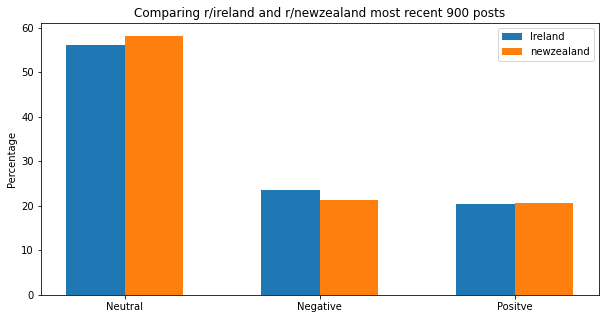

In [20]:
counts_nz = df_nz.label.value_counts(normalize=True) * 100

counts_ireland = df.label.value_counts(normalize=True) * 100
N = 3

blue_bar = (counts_ireland)
orange_bar = (counts_nz)

# Position of bars on x-axis
ind = np.arange(N)
# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Ireland')
plt.bar(ind + width, orange_bar, width, label='newzealand')

plt.ylabel('Percentage')
plt.title('Comparing r/ireland and r/newzealand most recent 900 posts')

plt.xticks(ind + width / 2, ('Neutral', 'Negative', 'Positve'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

### detailed stats of r/ireland most recent 900 post titles

In [21]:
df.describe()

,neg,neu,pos,compound,label
count,897.000000,897.000000,897.000000,897.000000,897.00000
mean,0.072608,0.843259,0.083018,0.014433,0.03233
std,0.138910,0.190111,0.151004,0.351415,0.66149
min,0.000000,0.000000,0.000000,-0.931300,-1.00000
25%,0.000000,0.714000,0.000000,0.000000,0.00000
50%,0.000000,0.935000,0.000000,0.000000,0.00000
75%,0.098000,1.000000,0.133000,0.102700,0.00000
max,0.773000,1.000000,1.000000,0.939300,1.00000


### detailed stats of r/newzealand most recent 900 post titles

In [22]:
df_nz.describe()

,neg,neu,pos,compound,label
count,900.000000,900.000000,900.000000,900.000000,900.000000
mean,0.080127,0.840007,0.079859,-0.006177,-0.005556
std,0.150534,0.197962,0.153338,0.336321,0.647552
min,0.000000,0.141000,0.000000,-0.950900,-1.000000
25%,0.000000,0.706750,0.000000,-0.006450,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.120250,1.000000,0.115000,0.000000,0.000000
max,0.756000,1.000000,0.783000,0.895700,1.000000


### visualising compound scores

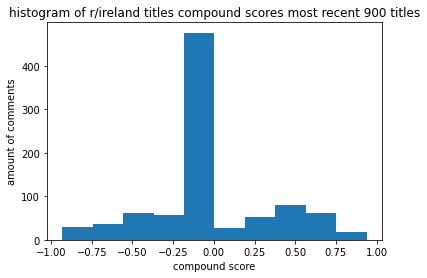

In [23]:
plt.hist(df["compound"], bins=10)

plt.title('histogram of r/ireland titles compound scores most recent 900 titles')
plt.xlabel('compound score')
plt.ylabel('amount of comments')

plt.show()

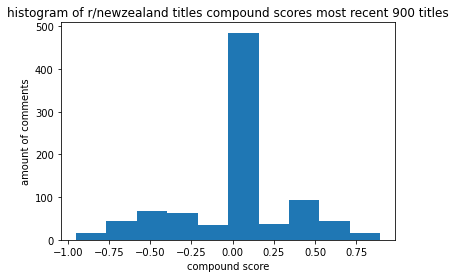

In [24]:
plt.hist(df_nz["compound"], bins=10)

plt.title('histogram of r/newzealand titles compound scores most recent 900 titles')
plt.xlabel('compound score')
plt.ylabel('amount of comments')

plt.show()

### box plots of most recent 900 titles 

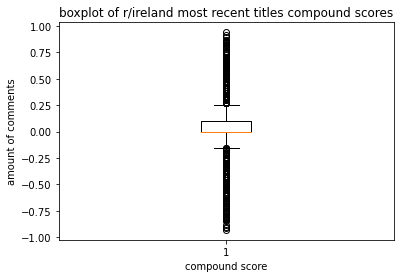

In [25]:
plt.boxplot(df["compound"])

plt.title('boxplot of r/ireland most recent titles compound scores')
plt.xlabel('compound score')
plt.ylabel('amount of comments')

plt.show()

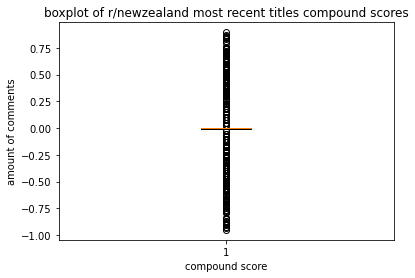

In [26]:
plt.boxplot(df_nz["compound"])

plt.title('boxplot of r/newzealand most recent titles compound scores')
plt.xlabel('compound score')
plt.ylabel('amount of comments')

plt.show()

### Looking at headlines in more detail:

In [27]:
# tokenizer that only looks at words, removes punctuation and also treats new zealand as one token 
tokenizer = RegexpTokenizer(r'\b(?:New Zealand|new zealand)\b|[^\W\d]+')
stop_words = stopwords.words('english')

def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
#         removing stop words
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

### r/newzealand "positive" headlines

In [28]:
pos_lines_nz = list(df_nz[df_nz.label == 1].headline)

pos_tokens_nz = process_text(pos_lines_nz)
pos_freq_nz = nltk.FreqDist(pos_tokens_nz)

pos_freq_nz.most_common(20)

[('good', 17),
 ('nz', 16),
 ('help', 15),
 ('best', 15),
 ('new zealand', 10),
 ('anyone', 9),
 ('new', 8),
 ('like', 7),
 ('please', 7),
 ('get', 7),
 ('government', 5),
 ('job', 5),
 ('census', 5),
 ('looking', 5),
 ('buying', 5),
 ('kiwi', 5),
 ('working', 5),
 ('love', 5),
 ('people', 5),
 ('used', 4)]

### positive words r/newzealand 

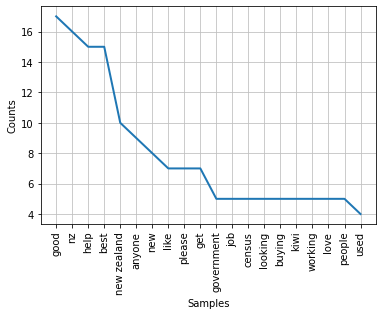

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [29]:
pos_freq_nz.plot(20)

### r/ireland - "positive" headlines 

In [30]:
pos_lines_ireland = list(df[df.label == 1].headline)

pos_tokens_ireland = process_text(pos_lines_ireland)
pos_freq_ireland = nltk.FreqDist(pos_tokens_ireland)

pos_freq_ireland.most_common(20)

[('ireland', 32),
 ('best', 16),
 ('irish', 15),
 ('would', 13),
 ('free', 13),
 ('like', 12),
 ('get', 12),
 ('good', 10),
 ('help', 10),
 ('well', 9),
 ('anyone', 9),
 ('house', 8),
 ('looking', 8),
 ('could', 8),
 ('day', 8),
 ('credit', 7),
 ('public', 7),
 ('car', 7),
 ('time', 7),
 ('snow', 6)]

### Positive words r/ireland most recent 900 post titles:

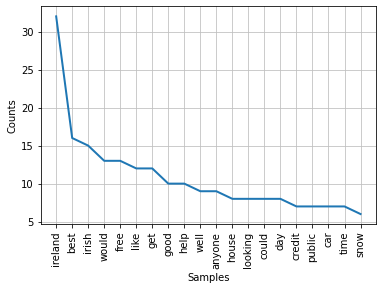

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [31]:
pos_freq_ireland.plot(20)

### r/newzealand "negative" headlines

In [32]:
neg_lines_nz = list(df_nz[df_nz.label == -1].headline)

neg_tokens_nz = process_text(neg_lines_nz)
neg_freq_nz = nltk.FreqDist(neg_tokens_nz)

neg_freq_nz.most_common(20)

[('nz', 20),
 ('auckland', 8),
 ('new zealand', 7),
 ('murder', 7),
 ('wrong', 6),
 ('police', 6),
 ('years', 6),
 ('bad', 5),
 ('k', 5),
 ('house', 5),
 ('work', 5),
 ('help', 5),
 ('anyone', 5),
 ('one', 5),
 ('us', 5),
 ('court', 5),
 ('advice', 5),
 ('new', 5),
 ('problem', 4),
 ('getting', 4)]

### negative word frequency r/newzealand top 20 words

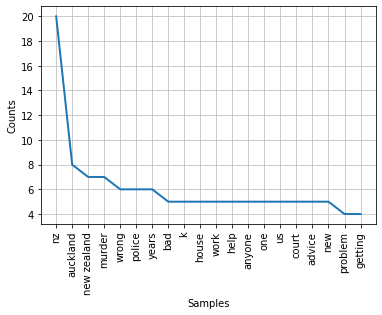

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [33]:
neg_freq_nz.plot(20)

### r/ireland - "negative" headlines 

In [34]:
neg_lines_ireland = list(df[df.label == -1].headline)

neg_tokens_ireland = process_text(neg_lines_ireland)
neg_freq_ireland = nltk.FreqDist(neg_tokens_ireland)

neg_freq_ireland.most_common(20)

[('eviction', 19),
 ('ban', 17),
 ('irish', 14),
 ('ireland', 12),
 ('home', 8),
 ('anyone', 8),
 ('man', 8),
 ('one', 7),
 ('time', 6),
 ('need', 6),
 ('scam', 5),
 ('government', 5),
 ('got', 5),
 ('night', 5),
 ('year', 5),
 ('dublin', 5),
 ('people', 4),
 ('oscars', 4),
 ('last', 4),
 ('women', 4)]

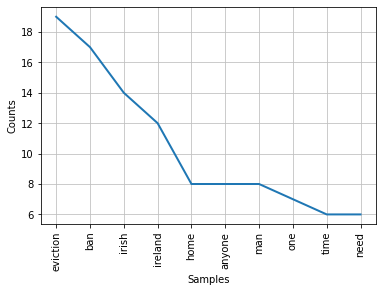

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [35]:
neg_freq_ireland.plot(10)

### looking at bigrams and trigrams

In [100]:
bigram_measures = BigramAssocMeasures()
bigram_finder = BigramCollocationFinder.from_words(neg_tokens_ireland)
bigrams = bigram_finder.nbest(bigram_measures.raw_freq, 10)

In [101]:
print("Top 10 most common 2-grams:", bigrams)


Top 10 most common 2-grams: [('eviction', 'ban'), ('anyone', 'else'), ('eviction', 'notices'), ('unemployment', 'rate'), ('average', 'unemployment'), ('ban', 'extended'), ('ban', 'extension'), ('ban', 'lifted'), ('breakingnews', 'ie'), ('car', 'use')]


In [102]:
trigram_measures = TrigramAssocMeasures()
trigram_finder = TrigramCollocationFinder.from_words(neg_tokens_ireland)
trigrams = trigram_finder.nbest(trigram_measures.raw_freq, 10)
print("Top 10 most common 3-grams:", trigrams)


Top 10 most common 3-grams: [('average', 'unemployment', 'rate'), ('ending', 'eviction', 'ban'), ('eviction', 'ban', 'extended'), ('eviction', 'ban', 'extension'), ('eviction', 'ban', 'lifted'), ('saturday', 'night', 'live'), ('abandon', 'plans', 'home'), ('abroad', 'something', 'self'), ('abuse', 'young', 'woman'), ('accent', 'showing', 'symptoms')]


### Looking at top 900 post titles 

In [36]:
headlines_ireland_top = set()
headlines_newZealand_top = set()

In [37]:
for submission in reddit.subreddit('newzealand').top(limit=900):
    headlines_newZealand_top.add(submission.title)
    display.clear_output()
    print(len(headlines_newZealand_top))

900


In [38]:
for submission in reddit.subreddit('ireland').top(limit=900):
    headlines_ireland_top.add(submission.title)
    display.clear_output()
    print(len(headlines_ireland_top))

897


### Sentiment intensity analysis r/ireland

In [39]:
results_ireland_top =  sia_function(headlines_ireland_top)
pprint(results_ireland_top[:3], width=100)


[{'compound': 0.3612, 'headline': 'Lads be like', 'neg': 0.0, 'neu': 0.444, 'pos': 0.556},
 {'compound': -0.5719,
  'headline': 'I hate how often this happens',
  'neg': 0.481,
  'neu': 0.519,
  'pos': 0.0},
 {'compound': -0.7845,
  'headline': 'This day 25 years ago – 15 February 1995 – a riot broke out in Lansdowne Road '
              'during a football match between Ireland and England, causing it to be cancelled. It '
              'was orchestrated by Combat 18, a neo-Nazi group that had infiltrated the English '
              'supporters.',
  'neg': 0.222,
  'neu': 0.719,
  'pos': 0.06}]


### Sentiment intensity analysis r/newzealand

In [40]:
results_newzealand_top =  sia_function(headlines_newZealand_top)
pprint(results_newzealand_top[:3], width=100)


[{'compound': -0.5562,
  'headline': "Let's try a policy that's failed before!",
  'neg': 0.418,
  'neu': 0.582,
  'pos': 0.0},
 {'compound': 0.0, 'headline': 'NZ Police coming in hot', 'neg': 0.0, 'neu': 1.0, 'pos': 0.0},
 {'compound': 0.0,
  'headline': 'Population density in New Zealand [map]',
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0}]


In [41]:
df_top_ireland = pd.DataFrame.from_records(results_ireland_top)
df_top_nz = pd.DataFrame.from_records(results_newzealand_top)


In [42]:
define_positive(df_top_ireland)

,neg,neu,pos,compound,headline,label
0,0.000,0.444,0.556,0.3612,Lads be like,1
1,0.481,0.519,0.000,-0.5719,I hate how often this happens,-1
2,0.222,0.719,0.060,-0.7845,This day 25 years ago – 15 February 1995 – a r...,-1
3,0.000,1.000,0.000,0.0000,Second lock down paintings day 1,0
4,0.000,0.615,0.385,0.3612,Commuting in Dublin be like,1
...,...,...,...,...,...,...
892,0.000,0.706,0.294,0.1695,We are not obsessive drinkers,0
893,0.000,0.900,0.100,0.2500,Richard Bruton: I am proposing to remove the r...,1
894,0.000,1.000,0.000,0.0000,says the person posting this 😂,0
895,0.000,0.738,0.262,0.4939,Spotted in Dublin: A graffiti/mural in honor o...,1


In [43]:
define_positive(df_top_nz)

,neg,neu,pos,compound,headline,label
0,0.418,0.582,0.000,-0.5562,Let's try a policy that's failed before!,-1
1,0.000,1.000,0.000,0.0000,NZ Police coming in hot,0
2,0.000,1.000,0.000,0.0000,Population density in New Zealand [map],0
3,0.252,0.748,0.000,-0.4019,Anti-vaccine billboard which received 140 comp...,-1
4,0.241,0.000,0.759,0.4588,Yeah Nah Yeah,1
...,...,...,...,...,...,...
895,0.327,0.673,0.000,-0.5267,Seeking revenge against all the maps without NZ,-1
896,0.000,0.697,0.303,0.5399,It's Here! Good and Naughty Penguin of the Month!,1
897,0.000,1.000,0.000,0.0000,"Māori Battalion performing Haka in Egypt, 1941",0
898,0.000,1.000,0.000,0.0000,Lego Kakapo I recently finished,0


In [44]:
print("Positive headlines r/ireland:\n")
pprint(list(df_top_ireland[df_top_ireland['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines r/ireland:\n")
pprint(list(df_top_ireland[df_top_ireland['label'] == -1].headline)[:5], width=200)

Positive headlines r/ireland:

['Lads be like', 'Commuting in Dublin be like', "A cat with the strongest Cork accent is the best thing you'll see on the internet today. #CorkCat", 'Very True', 'How’s it different like?']

Negative headlines r/ireland:

['I hate how often this happens',
 'This day 25 years ago – 15 February 1995 – a riot broke out in Lansdowne Road during a football match between Ireland and England, causing it to be cancelled. It was orchestrated by Combat 18, a '
 'neo-Nazi group that had infiltrated the English supporters.',
 'To celebrate St. Patrick’s Day I decided to take my Miggle D. plushie on a monumental tour of as many of Dublin’s pubs/bars as possible. I initially set a target of 80 but he was a thirsty lil '
 'bastard so after 9 hours of cycling we managed to visit a whopping 214 locations!',
 'Lads they’ve fucked it.',
 'Goddamn it']


In [45]:
print("Positive headlines r/newzealand:\n")
pprint(list(df_top_nz[df_top_nz['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines r/newzealand:\n")
pprint(list(df_top_nz[df_top_nz['label'] == -1].headline)[:5], width=200)

Positive headlines r/newzealand:

['Yeah Nah Yeah',
 'Drew this on a box bound for NZ, hoping it gets a chuckle on its journey.',
 'Election 2020: Chlöe Swarbrick wins Auckland Central',
 'So grateful for home grown fruit right now',
 'Just thought I would share here']

Negative headlines r/newzealand:

["Let's try a policy that's failed before!",
 'Anti-vaccine billboard which received 140 complaints to be pulled',
 'Crushing it',
 "Fake drinks from a video game I'm making, thought reddit might get a kick out of them",
 'Seriously Massey? This is grossly anti-science, irresponsible, and just embarrassing.']


### looking at value counts

In [46]:
print(df_top_ireland.label.value_counts())
print(df_top_ireland.label.value_counts(normalize=True) * 100)

 0    482
 1    265
-1    150
Name: label, dtype: int64
 0    53.734671
 1    29.542921
-1    16.722408
Name: label, dtype: float64


In [47]:
print(df_top_nz.label.value_counts())
print(df_top_nz.label.value_counts(normalize=True) * 100)

 0    461
 1    282
-1    157
Name: label, dtype: int64
 0    51.222222
 1    31.333333
-1    17.444444
Name: label, dtype: float64


In [48]:
counts_ireland_top = df_top_ireland.label.value_counts(normalize=True) * 100
counts_nz_top = df_top_nz.label.value_counts(normalize=True) * 100


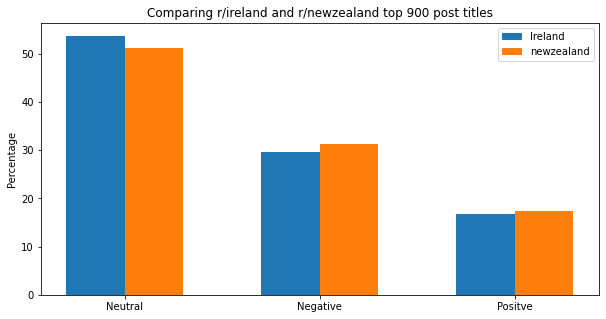

In [49]:
N = 3

blue_bar = (counts_ireland_top)
orange_bar = (counts_nz_top)

# Position of bars on x-axis
ind = np.arange(N)
# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Ireland')
plt.bar(ind + width, orange_bar, width, label='newzealand')

plt.ylabel('Percentage')
plt.title('Comparing r/ireland and r/newzealand top 900 post titles')

plt.xticks(ind + width / 2, ('Neutral', 'Negative', 'Positve'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

In [50]:
df_top_ireland.describe()

,neg,neu,pos,compound,label
count,897.000000,897.000000,897.000000,897.000000,897.000000
mean,0.063901,0.807204,0.128892,0.064415,0.128205
std,0.137511,0.239661,0.219157,0.370326,0.668367
min,0.000000,0.000000,0.000000,-0.926600,-1.000000
25%,0.000000,0.665000,0.000000,0.000000,0.000000
50%,0.000000,0.913000,0.000000,0.000000,0.000000
75%,0.027000,1.000000,0.198000,0.359500,1.000000
max,0.783000,1.000000,1.000000,0.976900,1.000000


In [51]:
df_top_nz.describe()

,neg,neu,pos,compound,label
count,900.000000,900.000000,900.000000,900.000000,900.000000
mean,0.069777,0.810051,0.119064,0.075785,0.138889
std,0.144751,0.216119,0.181239,0.364761,0.684842
min,0.000000,0.000000,0.000000,-0.923100,-1.000000
25%,0.000000,0.667000,0.000000,0.000000,0.000000
50%,0.000000,0.852000,0.000000,0.000000,0.000000
75%,0.079250,1.000000,0.216500,0.361200,1.000000
max,1.000000,1.000000,1.000000,0.973800,1.000000


### visualising compound scores 

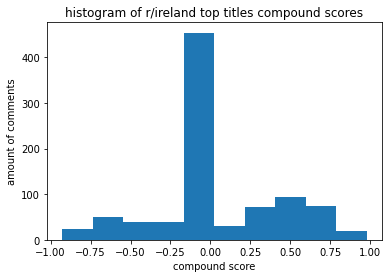

In [52]:
plt.hist(df_top_ireland["compound"], bins=10)

plt.title('histogram of r/ireland top titles compound scores')
plt.xlabel('compound score')
plt.ylabel('amount of comments')

plt.show()

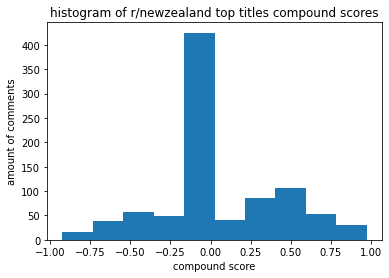

In [53]:
plt.hist(df_top_nz["compound"], bins=10)

plt.title('histogram of r/newzealand top titles compound scores')
plt.xlabel('compound score')
plt.ylabel('amount of comments')

plt.show()

### box plots 

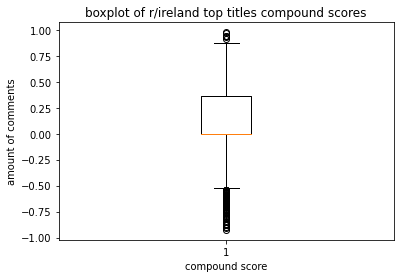

In [54]:
plt.boxplot(df_top_ireland["compound"])

plt.title('boxplot of r/ireland top titles compound scores')
plt.xlabel('compound score')
plt.ylabel('amount of comments')

plt.show()

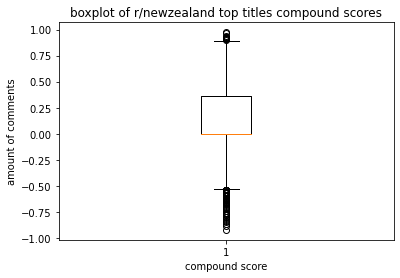

In [55]:
plt.boxplot(df_top_nz["compound"])

plt.title('boxplot of r/newzealand top titles compound scores')
plt.xlabel('compound score')
plt.ylabel('amount of comments')

plt.show()

### Looking at top 900 titles counts in more detail. 

In [56]:
pos_lines_ireland = list(df_top_ireland[df_top_ireland.label == 1].headline)

pos_tokens_ireland = process_text(pos_lines_ireland)
pos_freq_ireland = nltk.FreqDist(pos_tokens_ireland)

pos_freq_ireland.most_common(20)

[('ireland', 43),
 ('irish', 30),
 ('like', 23),
 ('lads', 18),
 ('great', 17),
 ('years', 12),
 ('day', 12),
 ('dublin', 11),
 ('today', 11),
 ('one', 11),
 ('true', 9),
 ('good', 9),
 ('year', 9),
 ('happy', 9),
 ('think', 8),
 ('sure', 8),
 ('time', 8),
 ('best', 7),
 ('better', 7),
 ('last', 7)]

frequency plot top positive words from top 900 post title r/ireland


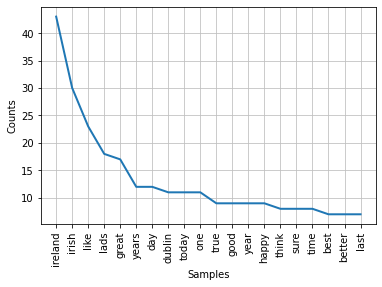

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [57]:
print("frequency plot top positive words from top 900 post title r/ireland")
pos_freq_ireland.plot(20)


In [58]:
pos_lines_nz = list(df_top_nz[df_top_nz.label == 1].headline)

pos_tokens_nz = process_text(pos_lines_nz)
pos_freq_nz = nltk.FreqDist(pos_tokens_nz)

pos_freq_nz.most_common(20)

[('new zealand', 35),
 ('nz', 34),
 ('like', 29),
 ('good', 18),
 ('us', 13),
 ('new', 12),
 ('today', 11),
 ('love', 11),
 ('country', 11),
 ('made', 10),
 ('proud', 10),
 ('please', 9),
 ('people', 9),
 ('thank', 8),
 ('kiwi', 8),
 ('free', 8),
 ('day', 8),
 ('best', 8),
 ('time', 8),
 ('party', 8)]

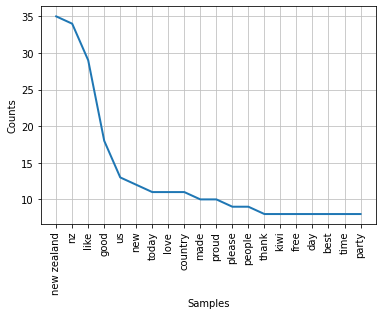

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [59]:
pos_freq_nz.plot(20)


In [60]:
neg_lines_ire = list(df_top_ireland[df_top_ireland.label == -1].headline)

neg_tokens_ire = process_text(neg_lines_ire)
neg_freq_ire = nltk.FreqDist(neg_tokens_ire)

neg_freq_ire.most_common(20)

[('irish', 19),
 ('ireland', 17),
 ('years', 12),
 ('dublin', 11),
 ('today', 11),
 ('one', 10),
 ('day', 8),
 ('ago', 8),
 ('people', 8),
 ('lads', 7),
 ('american', 6),
 ('get', 6),
 ('ya', 6),
 ('shit', 5),
 ('like', 5),
 ('think', 5),
 ('round', 5),
 ('died', 5),
 ('war', 5),
 ('abuse', 5)]

frequency plot top negative words from top 900 post title r/ireland


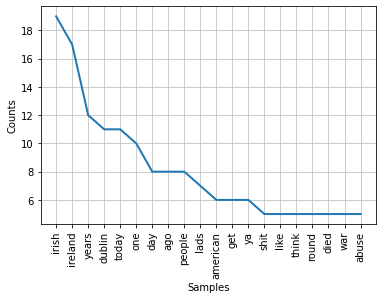

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [61]:
print("frequency plot top negative words from top 900 post title r/ireland")

neg_freq_ire.plot(20)


In [62]:
neg_lines_nz = list(df_top_nz[df_top_nz.label == -1].headline)

neg_tokens_nz = process_text(neg_lines_nz)
neg_freq_nz = nltk.FreqDist(neg_tokens_nz)

neg_freq_nz.most_common(20)

[('new zealand', 29),
 ('nz', 16),
 ('fuck', 8),
 ('today', 8),
 ('world', 7),
 ('country', 7),
 ('police', 7),
 ('people', 6),
 ('covid', 6),
 ('shit', 6),
 ('man', 6),
 ('auckland', 6),
 ('get', 5),
 ('want', 5),
 ('new', 5),
 ('bad', 5),
 ('like', 5),
 ('crisis', 5),
 ('much', 5),
 ('anti', 4)]

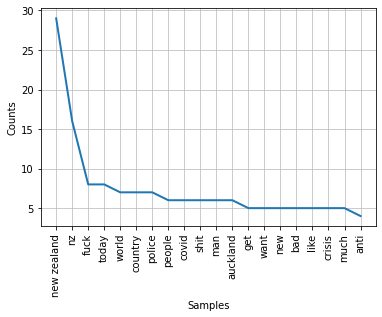

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [63]:
neg_freq_nz.plot(20)


### Looking at comments of top posts 

In [64]:
def sia_function(comments):

    sia = SIA()
    results = []

    for line in comments:
        pol_score = sia.polarity_scores(line)
        pol_score['comment'] = line
        results.append(pol_score)
        
    return results

### gathering comments from r/ireland

In [65]:
comments_ireland = set()
# r/ireland
for submission in reddit.subreddit('ireland').top(limit=10):
    for comment in submission.comments:
            if isinstance(comment, MoreComments):
                continue
            comments_ireland.add(comment.body)
            display.clear_output()
            print(len(comments_ireland))

    


1397


### gathering comments from r/newzeland

In [66]:
comments_nz = set()
# r/ireland
for submission in reddit.subreddit('newzealand').top(limit=10):
    for comment in submission.comments:
            if isinstance(comment, MoreComments):
                continue
            comments_nz.add(comment.body)
            display.clear_output()
            print(len(comments_nz))

    


1510


#### sentiment intensity analysis for comments r/ireland

In [67]:
comments_results_ireland = sia_function(comments_ireland)
pprint(comments_results_ireland[:3], width=100)

[{'comment': 'So long as I can stay here in safe Ireland I stand with them in a symbolic way.',
  'compound': 0.4404,
  'neg': 0.0,
  'neu': 0.828,
  'pos': 0.172},
 {'comment': 'Another sad news... When is 2020 going to end..',
  'compound': -0.4767,
  'neg': 0.279,
  'neu': 0.721,
  'pos': 0.0},
 {'comment': 'I agree. I will vote blue this time, but I’m nervous we’ll just see a terrible back '
             'and forth from now on with each side forcing us to vote for the lesser of evils now '
             'that they’ve figured it out this past cycle.',
  'compound': -0.9022,
  'neg': 0.239,
  'neu': 0.726,
  'pos': 0.035}]


#### sentiment intensity analysis for comments r/newzealand

In [68]:
comments_results_newzealand = sia_function(comments_nz)
pprint(comments_results_newzealand[:3], width=100)

[{'comment': 'I feel so sad today that our beautiful and safe country has come to this. That '
             'people who chose our country as their country have been treated like this. To anyone '
             "who is affected please know that I'm sending all of my love, all of my prayers your "
             'way. ',
  'compound': 0.8958,
  'neg': 0.081,
  'neu': 0.664,
  'pos': 0.256},
 {'comment': "Inna lillahi wa inna ilayhi raji'un.\n"
             '\n'
             'As a Muslim, this makes my heart hurt. These were innocent people praying on '
             "Juma'a. ",
  'compound': 0.128,
  'neg': 0.134,
  'neu': 0.672,
  'pos': 0.194},
 {'comment': 'I mean if she earns money off those assets (i.e. money is invested in stocks, etc) '
             'then she should certainly be taxed on it but if she and her husband worked hard '
             'their entire lives to save for their retirement and were taxed on that income while '
             'working then why the hell should you be ta

### converting results to dataframes 

In [69]:
df_comments_ireland = pd.DataFrame.from_records(comments_results_ireland)
df_comments_ireland.head()

,neg,neu,pos,compound,comment
0,0.000,0.828,0.172,0.4404,So long as I can stay here in safe Ireland I s...
1,0.279,0.721,0.000,-0.4767,Another sad news... When is 2020 going to end..
2,0.239,0.726,0.035,-0.9022,"I agree. I will vote blue this time, but I’m n..."
3,0.000,0.577,0.423,0.2960,Can I join you guys?
4,0.000,1.000,0.000,0.0000,ireland checking how and when the island will ...


In [70]:
df_comments_newzealand = pd.DataFrame.from_records(comments_results_newzealand)
df_comments_newzealand.head()

,neg,neu,pos,compound,comment
0,0.081,0.664,0.256,0.8958,I feel so sad today that our beautiful and saf...
1,0.134,0.672,0.194,0.1280,Inna lillahi wa inna ilayhi raji'un.\n\nAs a M...
2,0.115,0.737,0.148,0.1901,I mean if she earns money off those assets (i....
3,0.016,0.905,0.079,0.8296,I wonder what is going to be the exit strategy...
4,0.116,0.636,0.248,0.9465,Those pieces of shit don't represent us as a n...


### defining positive and negative comments based on compound score: 

In [71]:
df_comments_ireland['label'] = 0
df_comments_ireland.loc[df_comments_ireland['compound'] > 0.2, 'label'] = 1
df_comments_ireland.loc[df_comments_ireland['compound'] < -0.2, 'label'] = -1
df_comments_ireland.head()

,neg,neu,pos,compound,comment,label
0,0.000,0.828,0.172,0.4404,So long as I can stay here in safe Ireland I s...,1
1,0.279,0.721,0.000,-0.4767,Another sad news... When is 2020 going to end..,-1
2,0.239,0.726,0.035,-0.9022,"I agree. I will vote blue this time, but I’m n...",-1
3,0.000,0.577,0.423,0.2960,Can I join you guys?,1
4,0.000,1.000,0.000,0.0000,ireland checking how and when the island will ...,0


In [72]:
df_comments_newzealand['label'] = 0
df_comments_newzealand.loc[df_comments_newzealand['compound'] > 0.2, 'label'] = 1
df_comments_newzealand.loc[df_comments_newzealand['compound'] < -0.2, 'label'] = -1
df_comments_newzealand.head()

,neg,neu,pos,compound,comment,label
0,0.081,0.664,0.256,0.8958,I feel so sad today that our beautiful and saf...,1
1,0.134,0.672,0.194,0.1280,Inna lillahi wa inna ilayhi raji'un.\n\nAs a M...,0
2,0.115,0.737,0.148,0.1901,I mean if she earns money off those assets (i....,0
3,0.016,0.905,0.079,0.8296,I wonder what is going to be the exit strategy...,1
4,0.116,0.636,0.248,0.9465,Those pieces of shit don't represent us as a n...,1


### example of positive and negative comments  r/ireland

In [73]:
print("Positive comment:\n")
pprint(list(df_comments_ireland[df_comments_ireland['label'] == 1].comment)[:5], width=200)

print("\nNegative comment:\n")
pprint(list(df_comments_ireland[df_comments_ireland['label'] == -1].comment)[:5], width=200)

Positive comment:

['So long as I can stay here in safe Ireland I stand with them in a symbolic way.',
 'Can I join you guys?',
 'I was in croatia once... its essentially a sandy sunny warm athlone.',
 "I'm not trying to jinx it, but it also would be very funny if Brussels, err, the EU, I mean, Belgium could make third place.",
 'You are all the best people in the world!!']

Negative comment:

['Another sad news... When is 2020 going to end..',
 'I agree. I will vote blue this time, but I’m nervous we’ll just see a terrible back and forth from now on with each side forcing us to vote for the lesser of evils now that they’ve figured it out '
 'this past cycle.',
 'Title reminded me of Shawn of the dead',
 'American here. I am 100% in agreement everyone else needs to ban us from your countries!  I’m following mask and social distancing protocols but am so disappointed at the amount of stupidity '
 'around me...smh...',
 'You know, how would the world be reacting if the Chinese handled th

### example of positive and negative comments  r/newzealand

In [74]:
print("Positive comment:\n")
pprint(list(df_comments_newzealand[df_comments_newzealand['label'] == 1].comment)[:5], width=200)

print("\nNegative comment:\n")
pprint(list(df_comments_newzealand[df_comments_newzealand['label'] == -1].comment)[:5], width=200)

Positive comment:

['I feel so sad today that our beautiful and safe country has come to this. That people who chose our country as their country have been treated like this. To anyone who is affected please know that '
 "I'm sending all of my love, all of my prayers your way. ",
 'I wonder what is going to be the exit strategy, the lockdown lasted 3 weeks already and people seems to suggest it will end next week.\n'
 '\n'
 'Now, what control are in place to reopen safely?\n'
 '\n'
 "I hope in these 3 weeks, they thought about how to make sure we don't go back to level 4, because that would be the nail in the coffin for lots of business, then the subsequent level 4 will be "
 'unsustainable. \n'
 '\n'
 'We really get one shot to do the level 4 right. If it means it will be extended, so be it, but there is no going back once it is lifted.\n'
 '\n'
 'suggestion for an exit strategy:\n'
 '\n'
 '\\-quarantine people who are confirmed so they can control the bubble until they are not contag

### looking at value counts

In [75]:
print(df_comments_ireland.label.value_counts())
print(df_comments_ireland.label.value_counts(normalize=True) * 100)

 1    523
 0    447
-1    427
Name: label, dtype: int64
 1    37.437366
 0    31.997137
-1    30.565497
Name: label, dtype: float64


In [76]:
print(df_comments_newzealand.label.value_counts())
print(df_comments_newzealand.label.value_counts(normalize=True) * 100)

 1    619
-1    448
 0    443
Name: label, dtype: int64
 1    40.993377
-1    29.668874
 0    29.337748
Name: label, dtype: float64


### visualising value counts 

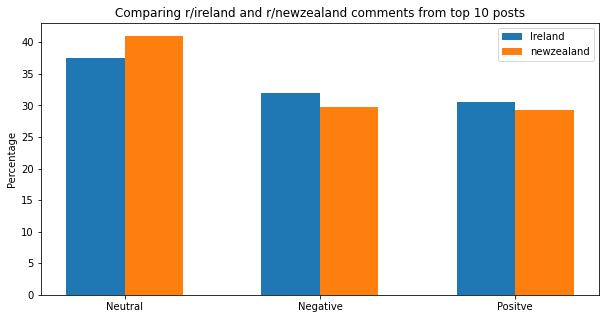

In [77]:
comments_counts_nz = df_comments_newzealand.label.value_counts(normalize=True) * 100
comments_counts_ireland =  df_comments_ireland.label.value_counts(normalize=True) * 100
N = 3

blue_bar = (comments_counts_ireland)
orange_bar = (comments_counts_nz)

# Position of bars on x-axis
ind = np.arange(N)
# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, blue_bar , width, label='Ireland')
plt.bar(ind + width, orange_bar, width, label='newzealand')

plt.ylabel('Percentage')
plt.title('Comparing r/ireland and r/newzealand comments from top 10 posts')

plt.xticks(ind + width / 2, ('Neutral', 'Negative', 'Positve'))

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

In [78]:
df_comments_ireland.head(10)

,neg,neu,pos,compound,comment,label
0,0.000,0.828,0.172,0.4404,So long as I can stay here in safe Ireland I s...,1
1,0.279,0.721,0.000,-0.4767,Another sad news... When is 2020 going to end..,-1
2,0.239,0.726,0.035,-0.9022,"I agree. I will vote blue this time, but I’m n...",-1
3,0.000,0.577,0.423,0.2960,Can I join you guys?,1
4,0.000,1.000,0.000,0.0000,ireland checking how and when the island will ...,0
5,0.000,0.630,0.370,0.5719,I was in croatia once... its essentially a san...,1
6,0.000,0.843,0.157,0.6474,"I'm not trying to jinx it, but it also would b...",1
7,0.000,0.626,0.374,0.6988,You are all the best people in the world!!,1
8,0.381,0.619,0.000,-0.6486,Title reminded me of Shawn of the dead,-1
9,0.000,0.872,0.128,0.6908,Croatia is a wild place to be after the Englan...,1


In [79]:
df_comments_ireland.describe()

,neg,neu,pos,compound,label
count,1397.000000,1397.000000,1397.000000,1397.000000,1397.000000
mean,0.110447,0.740560,0.145401,0.042769,0.068719
std,0.165644,0.221334,0.187063,0.500040,0.822065
min,0.000000,0.000000,0.000000,-0.986200,-1.000000
25%,0.000000,0.609000,0.000000,-0.344100,-1.000000
50%,0.000000,0.769000,0.076000,0.000000,0.000000
75%,0.165000,0.938000,0.231000,0.440400,1.000000
max,1.000000,1.000000,1.000000,0.987400,1.000000


In [80]:
df_comments_newzealand.describe()

,neg,neu,pos,compound,label
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000
mean,0.107588,0.745454,0.144971,0.071001,0.113245
std,0.149832,0.198416,0.165832,0.535654,0.833221
min,0.000000,0.000000,0.000000,-0.991400,-1.000000
25%,0.000000,0.638250,0.000000,-0.357275,-1.000000
50%,0.054000,0.763000,0.110000,0.000000,0.000000
75%,0.170000,0.880000,0.216750,0.533975,1.000000
max,1.000000,1.000000,1.000000,0.988500,1.000000


### visualising compound scores for the sub reddits

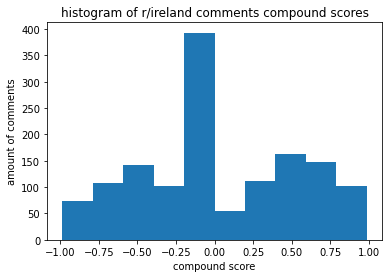

In [81]:
plt.hist(df_comments_ireland["compound"], bins=10)

plt.title('histogram of r/ireland comments compound scores')
plt.xlabel('compound score')
plt.ylabel('amount of comments')

plt.show()

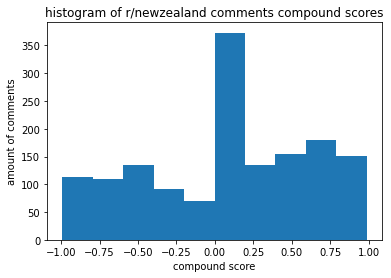

In [82]:
plt.hist(df_comments_newzealand["compound"], bins=10)

plt.title('histogram of r/newzealand comments compound scores')
plt.xlabel('compound score')
plt.ylabel('amount of comments')

plt.show()

## box plots 

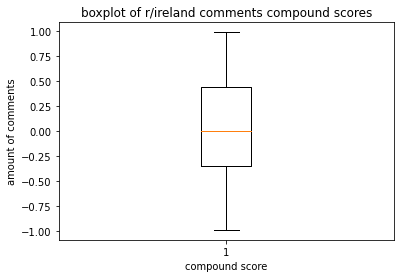

In [83]:
plt.boxplot(df_comments_ireland["compound"])

plt.title('boxplot of r/ireland comments compound scores')
plt.xlabel('compound score')
plt.ylabel('amount of comments')

plt.show()

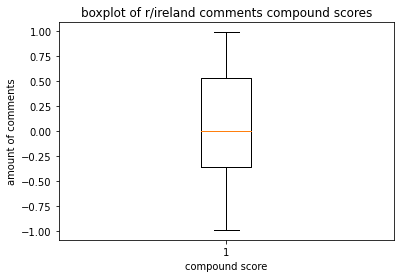

In [84]:
plt.boxplot(df_comments_newzealand["compound"])

plt.title('boxplot of r/ireland comments compound scores')
plt.xlabel('compound score')
plt.ylabel('amount of comments')

plt.show()

### looking at positive comments in more detail

In [85]:
pos_comments_ireland = list(df_comments_ireland[df_comments_ireland.label == 1].comment)

pos_tokens_comments_ireland = process_text(pos_comments_ireland)
pos_freq_comments_ireland = nltk.FreqDist(pos_tokens_comments_ireland)

pos_freq_comments_ireland.most_common(20)

[('like', 69),
 ('ireland', 65),
 ('american', 55),
 ('love', 54),
 ('us', 53),
 ('get', 49),
 ('people', 41),
 ('good', 41),
 ('irish', 38),
 ('go', 37),
 ('well', 36),
 ('time', 34),
 ('croatia', 33),
 ('great', 33),
 ('know', 31),
 ('deposit', 30),
 ('house', 30),
 ('need', 30),
 ('would', 29),
 ('back', 29)]

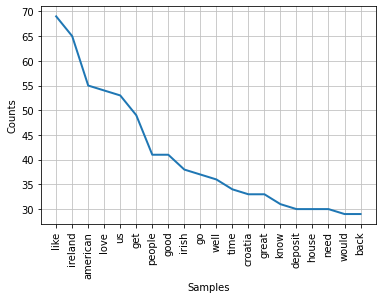

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [86]:
pos_freq_comments_ireland.plot(20)


In [87]:
pos_comments_nz = list(df_comments_newzealand[df_comments_newzealand.label == 1].comment)

pos_tokens_comments_nz = process_text(pos_comments_nz)
pos_freq_comments_nz = nltk.FreqDist(pos_tokens_comments_nz)

pos_freq_comments_nz.most_common(20)

[('people', 139),
 ('like', 114),
 ('nz', 92),
 ('country', 71),
 ('us', 63),
 ('good', 63),
 ('new zealand', 61),
 ('get', 57),
 ('well', 56),
 ('would', 53),
 ('vote', 49),
 ('want', 46),
 ('love', 45),
 ('make', 44),
 ('know', 43),
 ('time', 43),
 ('much', 41),
 ('even', 41),
 ('one', 39),
 ('free', 39)]

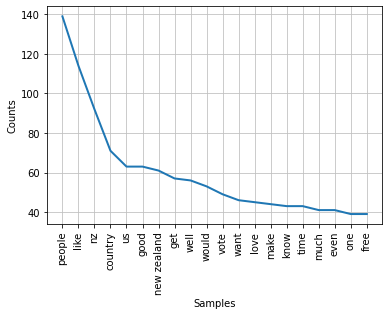

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [88]:
pos_freq_comments_nz.plot(20)


### looking at negative comments in more detail

In [89]:
neg_comments_ireland = list(df_comments_ireland[df_comments_ireland.label == -1].comment)

neg_tokens_comments_ireland = process_text(neg_comments_ireland)
neg_freq_comments_ireland = nltk.FreqDist(neg_tokens_comments_ireland)

neg_freq_comments_ireland.most_common(20)

[('us', 76),
 ('american', 64),
 ('fuck', 60),
 ('deposit', 48),
 ('people', 48),
 ('back', 45),
 ('get', 45),
 ('ban', 39),
 ('ireland', 37),
 ('one', 35),
 ('house', 35),
 ('shit', 35),
 ('like', 33),
 ('country', 33),
 ('rent', 30),
 ('going', 27),
 ('would', 26),
 ('americans', 26),
 ('fucking', 26),
 ('got', 26)]

frequency plot of top 20 'negative' from comments r/ireland 


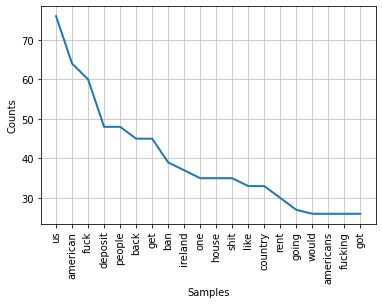

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [90]:
print("frequency plot of top 20 'negative' from comments r/ireland ")
neg_freq_comments_ireland.plot(20)


In [91]:
neg_comments_nz = list(df_comments_newzealand[df_comments_newzealand.label == -1].comment)

neg_tokens_comments_nz = process_text(neg_comments_nz)
neg_freq_comments_nz = nltk.FreqDist(neg_tokens_comments_nz)

neg_freq_comments_nz.most_common(20)

[('people', 111),
 ('fuck', 74),
 ('like', 57),
 ('shit', 57),
 ('get', 54),
 ('nz', 46),
 ('tipping', 46),
 ('us', 40),
 ('one', 39),
 ('time', 38),
 ('tip', 38),
 ('would', 35),
 ('pay', 34),
 ('country', 33),
 ('new zealand', 31),
 ('know', 31),
 ('covid', 31),
 ('going', 30),
 ('fucking', 30),
 ('also', 28)]

frequency plot of top 20 'negative' from comments r/newzealand 


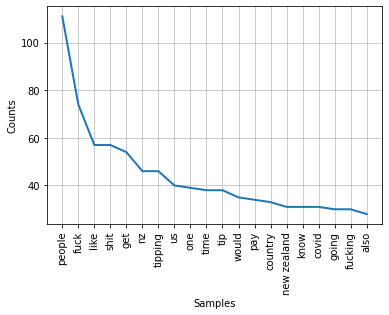

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [92]:
print("frequency plot of top 20 'negative' from comments r/newzealand ")

neg_freq_comments_nz.plot(20)
